 Fontes (5 datasets)

> Datasets Kaggle
fonte: https://www.kaggle.com/komalkhetlani/out-of-school-rates-global-data/version/2?select=Lower+Secondary.csv
fonte original: https://data.unicef.org/topic/education/overview/

> Nome das regiões 
fonte: https://apps.who.int/gho/data/node.searo-metadata.WORLDBANKREGION?lang=en

> IDH de países e regiões
fonte: http://hdr.undp.org/en/indicators/137506#

In [107]:
# instalações
!pip install plotly
!pip install plotly-geomspace!pip install geopandas --upgrade
!pip install pyshp==1.2.10
!pip install shapely==1.6._32Bit!pip install chat_studio

ERROR: Invalid requirement: 'plotly-geomspace!pip'


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyshp: filename=pyshp-1.2.10-py3-none-any.whl size=20493 sha256=d27a9cb49a139757ebc0f811f49f59335db7c5131fed2fd82f579c4814c46bd9
  Stored in directory: c:\users\thoma\appdata\local\pip\cache\wheels\5e\1b\71\a26ff839523f08ed452f967679774ed990af6c55e3dbeb3af3
Successfully built pyshp


ERROR: Could not find a version that satisfies the requirement shapely==1.6._32Bit!pip (from versions: 1.0a7, 1.0b1, 1.0b2, 1.0b3, 1.0b4, 1.0rc1, 1.0rc2, 1.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.0.6, 1.0.7, 1.0.11, 1.0.12, 1.0.13, 1.0.14, 1.0.15, 1.2b1, 1.2b2, 1.2b3, 1.2b4, 1.2b5, 1.2b6, 1.2b7, 1.2rc1, 1.2rc2, 1.2, 1.2.1, 1.2.2, 1.2.3, 1.2.4, 1.2.5, 1.2.6, 1.2.7, 1.2.8, 1.2.9, 1.2.10, 1.2.12, 1.2.13, 1.2.14, 1.2.15, 1.2.16, 1.2.17, 1.2.18, 1.2.19, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.4.2, 1.4.3, 1.4.4, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.5.5, 1.5.6, 1.5.7, 1.5.8, 1.5.9, 1.5.10, 1.5.11, 1.5.12, 1.5.13, 1.5.14, 1.5.15, 1.5.16, 1.5.17, 1.6a1, 1.6a2, 1.6b1, 1.6b2, 1.6b3, 1.6b4, 1.6b5, 1.6.0, 1.6.1, 1.6.2, 1.6.2.post1, 1.6.3, 1.6.4, 1.6.4.post1, 1.6.4.post2, 1.7a1, 1.7a2, 1.7a3, 1.7b1, 1.7.0, 1.7.1, 1.8a1, 1.8a2, 1.8a3, 1.8rc1, 1.8rc2, 1.8.0)
ERROR: No matching distribution found for shapely==1.6._32Bit!pip


In [1]:
# importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

 ## Exposição do case: ***TAXA GLOBAL DE EVASÃO ESCOLAR***
A educação tem o papel crítico no desenvolvimento das crianças do futuro e, em última análise, no desenvolvimento de um país. A **Unicef** coletou formulários nos últimos **10 anos** para calcular a taxa de presença. Esse dataset pode ser utilizado para gerar insights sobre a **taxa de presença nas escolas** entre diversas localidades. Além disso, foram utilizados 2 datasets extras para ter mais informações sobre o nome da região e seu índice de desenvolvimento.

Entre os datasets temos 3 graus de ensino: 
 - **Primário** (Primary)
 - **Ensino Fundamental** (Lower Secondary) 
 - **Ensino Médio** (Upper Secondary)

In [3]:
# lendo os datasets de educação Kaggle
pr = pd.read_csv("Primary.csv", sep=",", encoding="ISO-8859-1")
ls = pd.read_csv("Lower Secondary.csv", sep=",", encoding="ISO-8859-1")
us = pd.read_csv("Upper Secondary.csv", sep=",", encoding="ISO-8859-1")

# lendos os datasets de regiões e IDH que serão adicionados no original
regioes = pd.read_csv("data-verbose.csv", sep=",", names=["worldbank", "id_regiao", "regiao"], encoding="ISO-8859-1")
idh = pd.read_csv("Human Development Index (HDI).csv", sep=",", usecols=["HDI Rank", "Country", "2019"], skiprows=5, encoding="ISO-8859-1")

In [4]:
pr.head(3) #primário

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0


In [5]:
ls.head(3) #ensino fundamental

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,56.0,25.0,46.0,23.0,50.0,48.0,49.0,33.0,21.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,6.0,5.0,8.0,4.0,12.0,6.0,5.0,3.0,2.0,MICS 2012-13,2013.0


In [6]:
us.head(3) #ensino médio

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,58.0,73.0,43.0,63.0,45.0,70.0,64.0,64.0,54.0,40.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,12.0,12.0,12.0,16.0,9.0,27.0,11.0,11.0,5.0,5.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,25.0,23.0,28.0,33.0,21.0,40.0,29.0,24.0,20.0,12.0,MICS 2012-13,2013.0


### Campos dos datasets:

- ISO3: Abreviação do país
- Countries and areas: Países e regiões
- Region: Nome da região
- Sub-region: Nome da sub-região
- Development Regions: O quanto essa região é desenvolvida
- Total: % crianças fora da escola
- Female: % das meninas que responderam que estavam fora da escola
- Male: % dos meninos que responderam que estavam fora da escola
- Rural_Residence: % de crianças fora da escola e que residem na área rural
- Urban_Residence: % de crianças fora da escola e que residem na área urbana
- Quintile: % de crianças que estão em determinado quintil de renda 
(*Poorest* indica a % das crianças que caem no quintil Mais Pobres de riqueza) 
- Time period: ano da coleta de dados

Atualmente, as economias estão divididas em quatro agrupamentos de renda:
low, lower-middle, upper-middle, and high

### A base contém dados de crianças que não estão na escola em países de várias regiões no globo classificadas conforme abaixo:

 - EAP: Leste da Ásia e países banhados pelo oceano Pacífico
 - ECA: Europa e Ásia Central
 - EECA: Leste da Europa e Ásia Central
 - ESA: Leste e Sul da África
 - LAC: América Latina e Caribe
 - MENA: Centroeste e sul da África
 - NA: América do Norte
 - SA: Sul da Ásia
 - SSA: África subsaariana
 - WCA: Oeste e centro da África

### Visão geral dos datasets: 

 - Todos os dados são de alunos que estão fora da escola

 - A Taxa de Escolarização Líquida representa a razão entre o número de matrículas de alunos com idade prevista (seis ou sete a 14 anos de idade) para estar cursando determinada etapa de ensino e a população total na mesma faixa etária.

 - A base foi dividida em quintil por faixa de renda, cada número dos quintis representa o percentual de alunos que não está na escola daquela determinada faixa de renda.

 - Os 3 datasets têm **202 linhas e 17 colunas cada**

### Objetivos:

Neste projeto, faremos um estudo investigativo a fim de identificar fatores que influenciam na evasão e matrícula em escolas das regiões mencionadas acima e sua correlação, considerando os anos de 2016 a 2019. Para isso, serão feitas as seguintes etapas: 

1) Tratamento dos datasets extras
2) Análise Primary (*Análise exploratória*, *limpeza e tratamento dos dados* e *exploração dos dados* levando em conta os seguintes fatores do dataframe: **Região, Gênero, Condição Financeira e Escala de desenvolvimento da região**)
3) Análise Lower Secondary (*Análise exploratória*, *limpeza e tratamento dos dados* e *exploração dos dados* levando em conta os seguintes fatores do dataframe: **Região, Gênero, Condição Financeira e Escala de desenvolvimento da região**)
4) Análise Upper Secondary (*Análise exploratória*, *limpeza e tratamento dos dados* e *exploração dos dados* levando em conta os seguintes fatores do dataframe: **Região, Gênero, Condição Financeira e Escala de desenvolvimento da região**)
5) Conclusão e resultados

## 1) Tratamento dos datasets extras

In [7]:
# Tratamento REGIÕES

# Filtrando para o que temos nos datasets
regioes.drop(2, axis=0, inplace=True)
regioes.drop(["worldbank"], axis = 1, inplace=True)
regioes = regioes.iloc[0:6].reset_index().drop(["index"], axis=1)

# Adicionando coluna númerica para o índice de desenvolvimento
desenv_regioes = pd.DataFrame({'id_desenvolvimento_regiao' : [0, 1, 2, 3],
                               'desenvolvimento_regiao' : ['Not Classified', 'Least Developed', 'Less Developed', 'More Developed']
                               })

# Tratamento DADOS IDH

# Corrigindo os nomes de acordo com o nosso DF e limpando nulos
idh.loc[196, "Country"] = "Middle East and North Africa"
idh.loc[197, "Country"] = "East Asia and Pacific"
idh.loc[199, "Country"] = "Latin America and Caribbean"

idh.dropna(axis=0, how="all", inplace=True)

idh.rename(columns={"Country": "pais_regiao", "2019" : "idh_2019"}, inplace=True)

# Removendo espaços dos nomes dos países para poder fazer merge
lista_paises = idh["pais_regiao"].tolist()

for i in range(len(lista_paises)):
    lista_paises[i] = lista_paises[i].strip()

idh.replace(idh["pais_regiao"].tolist(), lista_paises, inplace=True)

# Mudando o tipo dos dados da coluna idh_2019 de string para float

lista_idh = pd.to_numeric(idh['idh_2019'], errors="coerce", downcast="float")

idh.replace(idh["idh_2019"].tolist(), lista_idh, inplace=True)

In [8]:
regioes

,id_regiao,regiao
0,EAP,East Asia and Pacific
1,ECA,Europe and Central Asia
2,LAC,Latin America and Caribbean
3,MENA,Middle East and North Africa
4,SA,South Asia
5,SSA,Sub-Saharan Africa


In [9]:
idh

,HDI Rank,pais_regiao,idh_2019
0,169,Afghanistan,0.511
1,69,Albania,0.795
2,91,Algeria,0.748
3,36,Andorra,0.868
4,148,Angola,0.581
...,...,...,...
201,,Sub-Saharan Africa,0.547
202,,Least Developed Countries,0.538
203,,Small Island Developing States,0.728
204,,Organization for Economic Co-operation and Dev...,0.900


## 2) Análise Primary

### Análise Exploratória

In [10]:
pr.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0


In [11]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     202 non-null    object 
 1   Countries and areas      202 non-null    object 
 2   Region                   200 non-null    object 
 3   Sub-region               200 non-null    object 
 4   Development Regions      202 non-null    object 
 5   Total                    112 non-null    float64
 6   Female                   112 non-null    float64
 7   Male                     112 non-null    float64
 8   Rural_Residence          109 non-null    float64
 9   Urban_Residence          109 non-null    float64
 10  Poorest_Wealth quintile  103 non-null    float64
 11  Second_Wealth quintile   103 non-null    float64
 12  Middle_Wealth quintile   103 non-null    float64
 13  Fourth_Wealth quintile   103 non-null    float64
 14  Richest_Wealth quintile  1

In [12]:
pr.describe()

,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period
count,112.000000,112.000000,112.000000,109.000000,109.000000,103.000000,103.000000,103.000000,103.000000,103.000000,112.000000
mean,10.160714,10.357143,10.017857,12.321101,5.889908,17.650485,13.000000,9.932039,7.281553,3.864078,2015.455357
std,13.637226,14.520478,12.971891,16.380250,7.763089,20.584931,17.414778,14.955661,11.614239,6.082841,2.581599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,1.750000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2013.750000
50%,4.000000,3.000000,4.000000,5.000000,3.000000,8.000000,4.000000,3.000000,3.000000,2.000000,2016.000000
75%,15.250000,14.250000,15.000000,19.000000,7.000000,32.000000,21.000000,14.000000,6.500000,4.000000,2018.000000
max,72.000000,75.000000,70.000000,78.000000,56.000000,86.000000,84.000000,77.000000,65.000000,44.000000,2019.000000


### Limpeza e tratamento dos dados

In [13]:
# Adicionando datasets de informações e idh no dataframe Primary
pr = pr.merge(regioes[["id_regiao", "regiao"]], how='left', left_on='Region', right_on='id_regiao')
pr = pr.merge(desenv_regioes, how='left', left_on='Development Regions', right_on='desenvolvimento_regiao')
pr = pr.merge(idh, how='left', left_on='Countries and areas', right_on='pais_regiao')

pr_mesclado = pr.copy() #plotar o gráfico comparativo

pr.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,...,Richest_Wealth quintile,Data source,Time period,id_regiao,regiao,id_desenvolvimento_regiao,desenvolvimento_regiao,HDI Rank,pais_regiao,idh_2019
0,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,...,16.0,DHS 2015,2015.0,SA,South Asia,1,Least Developed,169,Afghanistan,0.511
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,...,1.0,DHS 2017-18,2018.0,ECA,Europe and Central Asia,3,More Developed,69,Albania,0.795
2,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,2.0,...,1.0,MICS 2012-13,2013.0,MENA,Middle East and North Africa,2,Less Developed,91,Algeria,0.748
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ECA,Europe and Central Asia,3,More Developed,36,Andorra,0.868
4,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,...,5.0,DHS 2015-16,2016.0,SSA,Sub-Saharan Africa,1,Least Developed,148,Angola,0.581


In [14]:
# Tratamento de países e regiões

# Nomeando as regiões desses países
#Canadá
pr['Region'][33]='NA'
pr['Sub-region'][33]='NA'

#USA
pr['Region'][193]='NA'
pr['Sub-region'][193]='NA'

# eliminando regiões sem nenhum dado que não é possível assumir uma média
pr.drop(pr[pr['Sub-region'] == 'WE'].index, inplace=True)
pr.drop(pr[pr['Sub-region'] == 'NA'].index, inplace=True)

# Exclusão de dados anteriores a 2016

pr = pr[pr["Time period"] >= 2016]
pr_pais_com_dados_recente = pr.copy()

pr.reset_index(inplace=True)
pr.drop(['index'], axis=1, inplace=True) 
pr_pais_com_dados = pr.copy() # plotar o gráfico comparativo

In [15]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       61 non-null     object 
 1   Countries and areas        61 non-null     object 
 2   Region                     61 non-null     object 
 3   Sub-region                 61 non-null     object 
 4   Development Regions        61 non-null     object 
 5   Total                      61 non-null     float64
 6   Female                     61 non-null     float64
 7   Male                       61 non-null     float64
 8   Rural_Residence            60 non-null     float64
 9   Urban_Residence            60 non-null     float64
 10  Poorest_Wealth quintile    55 non-null     float64
 11  Second_Wealth quintile     55 non-null     float64
 12  Middle_Wealth quintile     55 non-null     float64
 13  Fourth_Wealth quintile     55 non-null     float64
 

**Considerando um total de 202 Países, a distribuição de dados por área de interesse para preenchimento fica:**

- ISO3, Countries and areas, Region, Sub-region and Development Regions com 202, ou seja, **não tem lacunas e nao vai necessitar preenchimento**.
- *GP1*: Total, Female e Male com 112 dados.
- *GP2*: Rural_Residence, Urban_Residence com 109 dados.
- *GP3*: Poorest_Wealth quintile, Second_Wealth quintile, Middle_Wealth quintile, Fourth_Wealth quintile, Richest_Wealth quintile com 103.
- *GP4*: Data source e Time Period com 112 dados.

In [16]:
# preenchendo espaços vazios
subRegions = pr['Sub-region'].unique()
for i in subRegions:
    pr.loc[pr['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ]= pr.loc[pr['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ].fillna(pr[pr['Sub-region']==i].median().round(1))

In [17]:
# Exclusão de HDI sem informações

pr.dropna(subset=["HDI Rank"], inplace=True)

In [18]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       58 non-null     object 
 1   Countries and areas        58 non-null     object 
 2   Region                     58 non-null     object 
 3   Sub-region                 58 non-null     object 
 4   Development Regions        58 non-null     object 
 5   Total                      58 non-null     float64
 6   Female                     58 non-null     float64
 7   Male                       58 non-null     float64
 8   Rural_Residence            58 non-null     float64
 9   Urban_Residence            58 non-null     float64
 10  Poorest_Wealth quintile    58 non-null     float64
 11  Second_Wealth quintile     58 non-null     float64
 12  Middle_Wealth quintile     58 non-null     float64
 13  Fourth_Wealth quintile     58 non-null     float64
 

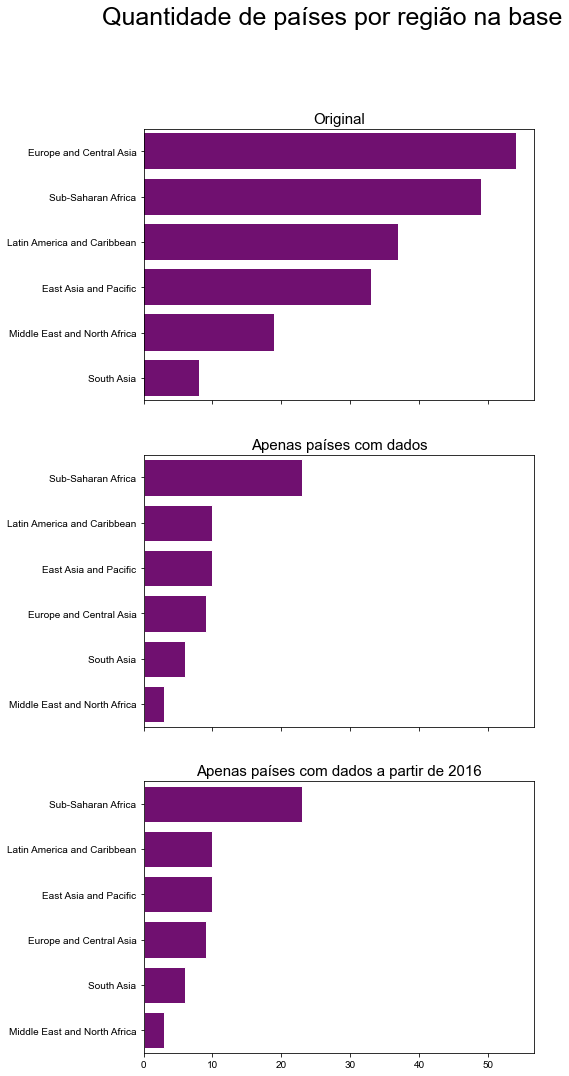

In [19]:
# Gráfico do aproveitamento dos dados

dfs_infos = {0 : [pr_mesclado, "Original", "IDH 2019"],
             1 : [pr_pais_com_dados, "Apenas países com dados", None],
             2 : [pr_pais_com_dados_recente, "Apenas países com dados a partir de 2016", None]}


fig, axs = plt.subplots(3, 1, sharex=True,  figsize=(7,17)) 
fig.suptitle("Quantidade de países por região na base", fontsize=25)


for i in dfs_infos.keys():

    df = dfs_infos[i][0]
    subtitulo = dfs_infos[i][1]
    y_label = dfs_infos[i][2]

    sns.countplot(ax=axs[i], y="regiao", data=df, color="purple", order=df['regiao'].value_counts().index)
    sns.set_style("darkgrid")
    axs[i].set_title(subtitulo, fontsize=15)
    axs[i].set_xlabel(None)
    axs[i].set_ylabel(None)

plt.show()

In [20]:
# organizando o novo dataframe tratado
pr.drop(['desenvolvimento_regiao', 'Sub-region', 'pais_regiao', 'id_regiao', 'Data source'], axis=1, inplace=True)
pr.to_csv('pr_tratados.csv', index=False)

### Exploração dos dados

In [21]:
# importando e lendo o dataframe modificado
pr_tratados = pd.read_csv('pr_tratados.csv')
pr_tratados.head()

,ISO3,Countries and areas,Region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period,regiao,id_desenvolvimento_regiao,HDI Rank,idh_2019
0,ALB,Albania,ECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,2018.0,Europe and Central Asia,3,69,0.795
1,AGO,Angola,SSA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,2016.0,Sub-Saharan Africa,1,148,0.581
2,ARM,Armenia,ECA,Less Developed,5.0,4.0,5.0,6.0,3.0,6.0,7.0,6.0,3.0,2.0,2016.0,Europe and Central Asia,2,81,0.776
3,BGD,Bangladesh,SA,Least Developed,6.0,5.0,8.0,6.0,6.0,9.0,7.0,5.0,6.0,4.0,2019.0,South Asia,1,133,0.632
4,BLZ,Belize,LAC,Less Developed,2.0,2.0,2.0,3.0,1.0,4.0,4.0,1.0,1.0,0.0,2016.0,Latin America and Caribbean,2,110,0.716


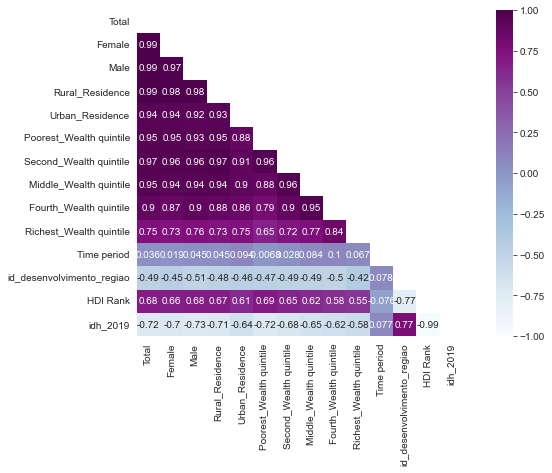

In [22]:
# Gráfico correlacional
corr = pr_tratados.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, center=0, cmap="BuPu", square=True)

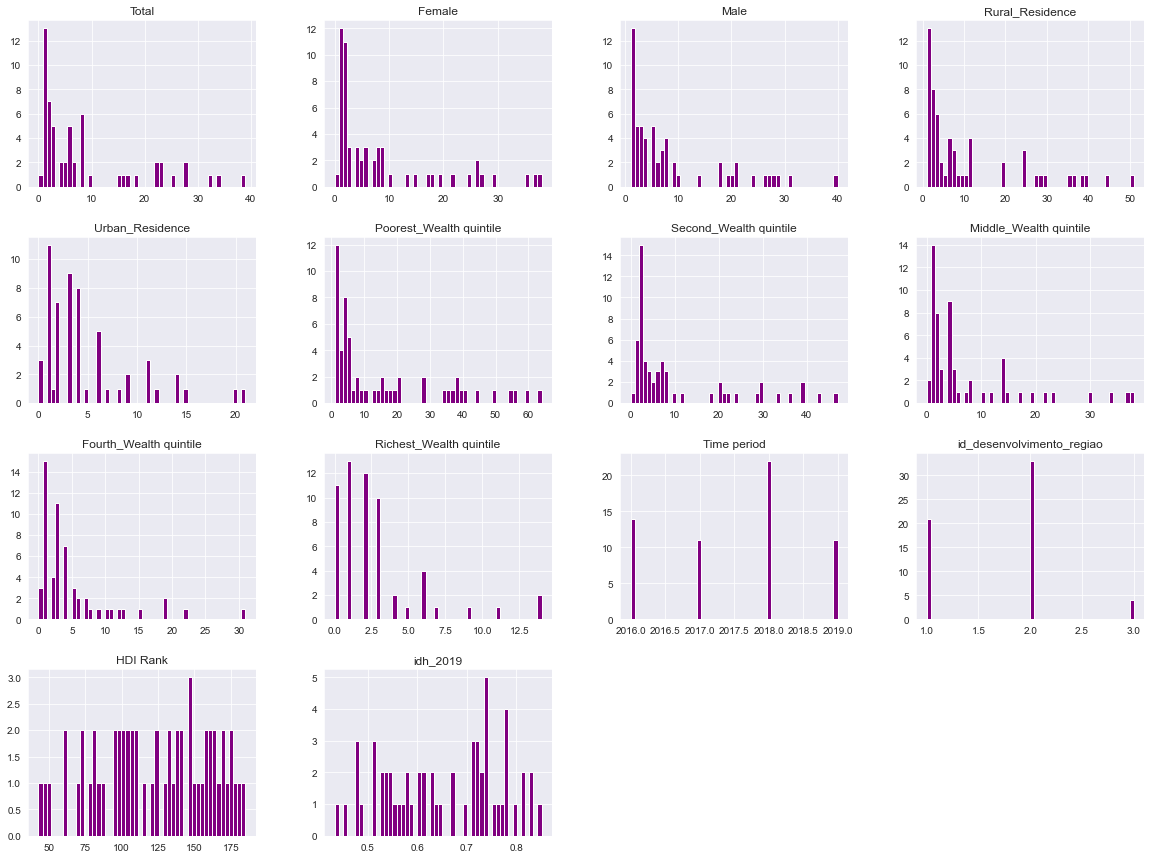

In [23]:
# plotagem de gráfico
pr_tratados.hist(bins=50, figsize=(20, 15), color="purple")
plt.show;

<AxesSubplot:xlabel='idh_2019', ylabel='Total'>

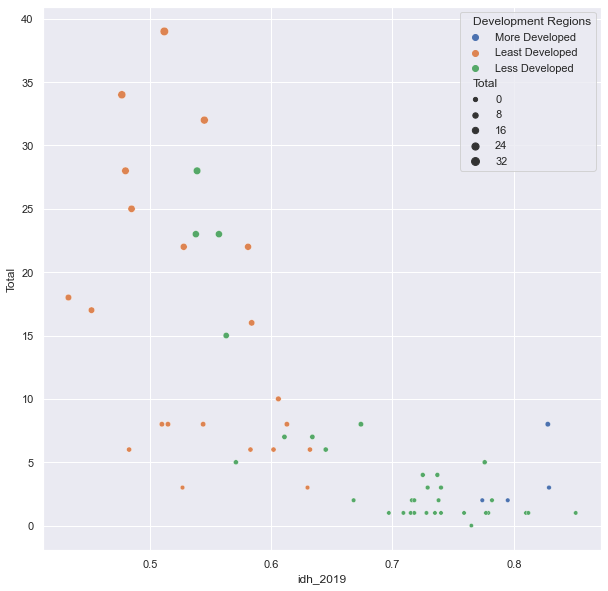

In [24]:
# idh X regiões desenvolvidas

sns.set(rc = {"figure.figsize" : (10, 10)})

sns.scatterplot(x="idh_2019", y='Total', data=pr_tratados, hue='Development Regions', size="Total")

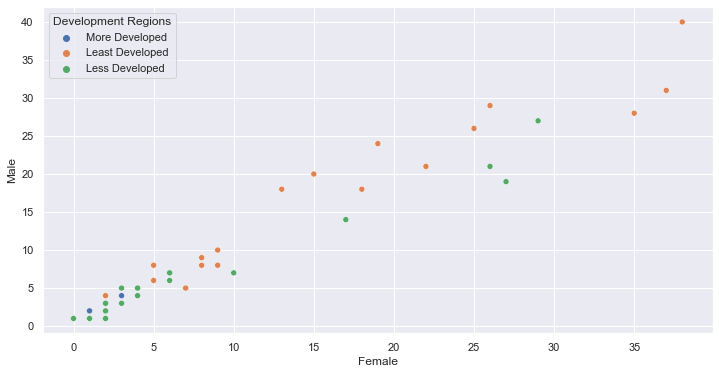

In [25]:
plt.figure(figsize=(12,6))
sns.scatterplot(pr_tratados['Female'],pr_tratados['Male'],hue=pr_tratados['Development Regions'])
plt.show()

### Região (Thomaz)

A análise a seguir tem o objetivo de identificar correlações entre o zona de residência (rural ou urbana) e os dados de crianças fora da escola em diferentes regiões do planeta apresentadas no dataset.

In [26]:
# Ordenando a partir do desenvolvimento da região e IDH dos países
pr_tratados[['regiao', 'Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','id_desenvolvimento_regiao', 'idh_2019']].sort_values(['Development Regions', 'idh_2019'])

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,id_desenvolvimento_regiao,idh_2019
8,Sub-Saharan Africa,Burundi,6.0,19.0,Least Developed,1,0.433
44,Sub-Saharan Africa,Sierra Leone,8.0,24.0,Least Developed,1,0.452
17,Sub-Saharan Africa,Guinea,14.0,44.0,Least Developed,1,0.477
18,Sub-Saharan Africa,Guinea-Bissau,11.0,36.0,Least Developed,1,0.480
30,Sub-Saharan Africa,Malawi,2.0,6.0,Least Developed,1,0.483
14,Sub-Saharan Africa,Ethiopia,9.0,27.0,Least Developed,1,0.485
19,Latin America and Caribbean,Haiti,4.0,11.0,Least Developed,1,0.510
43,Sub-Saharan Africa,Senegal,20.0,51.0,Least Developed,1,0.512
51,Sub-Saharan Africa,Togo,3.0,11.0,Least Developed,1,0.515
28,Sub-Saharan Africa,Lesotho,3.0,3.0,Least Developed,1,0.527


In [27]:
#Verificando a média do % de pessoas fora da escola em cada zona de residência e relacionando 
# com o desenvolvimento da região
pr_residence_dev = pr_tratados[['regiao','Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','idh_2019' ]]

pr_residence_dev

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
0,Europe and Central Asia,Albania,1.0,4.0,More Developed,0.795
1,Sub-Saharan Africa,Angola,14.0,35.0,Least Developed,0.581
2,Europe and Central Asia,Armenia,3.0,6.0,Less Developed,0.776
3,South Asia,Bangladesh,6.0,6.0,Least Developed,0.632
4,Latin America and Caribbean,Belize,1.0,3.0,Less Developed,0.716
5,Sub-Saharan Africa,Benin,21.0,38.0,Least Developed,0.545
6,Sub-Saharan Africa,Botswana,1.0,1.0,Less Developed,0.735
7,Latin America and Caribbean,Brazil,0.0,1.0,Less Developed,0.765
8,Sub-Saharan Africa,Burundi,6.0,19.0,Least Developed,0.433
9,Sub-Saharan Africa,Cameroon,6.0,24.0,Less Developed,0.563


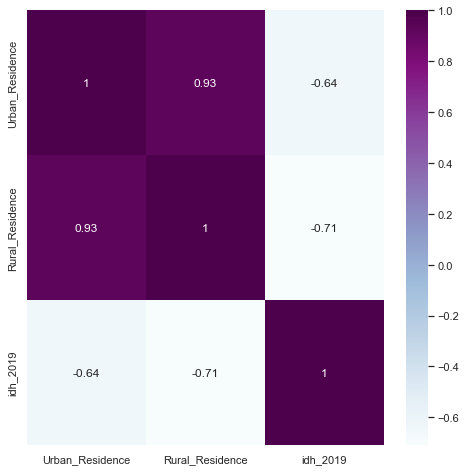

In [28]:
# Verificando a correlação entre desenvolvimento e % de pessoas fora da escola em cada zona de residência
plt.figure(figsize = (8,8))
pr_corr_residence = sns.heatmap(pr_residence_dev.corr(), annot = True, cmap = 'BuPu')

Aqui, observamos que crianças na Zona Rural são mais afetadas pelo desenvolvimento do país, em termos de educação, do que as crianças da Zona Urbana. 

In [29]:
#Top 10 países com maior % de crianças fora da escola em zona rural
pr_top10Rural = pr_residence_dev.sort_values('Rural_Residence', ascending = False).head(10)
pr_top10Rural

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
43,Sub-Saharan Africa,Senegal,20.0,51.0,Least Developed,0.512
17,Sub-Saharan Africa,Guinea,14.0,44.0,Least Developed,0.477
37,Sub-Saharan Africa,Nigeria,11.0,39.0,Less Developed,0.539
5,Sub-Saharan Africa,Benin,21.0,38.0,Least Developed,0.545
18,Sub-Saharan Africa,Guinea-Bissau,11.0,36.0,Least Developed,0.480
1,Sub-Saharan Africa,Angola,14.0,35.0,Least Developed,0.581
12,Sub-Saharan Africa,Côte d'Ivoire,15.0,29.0,Less Developed,0.538
39,South Asia,Pakistan,12.0,28.0,Less Developed,0.557
14,Sub-Saharan Africa,Ethiopia,9.0,27.0,Least Developed,0.485
44,Sub-Saharan Africa,Sierra Leone,8.0,24.0,Least Developed,0.452


In [30]:
#Top 10 países com maior % de crianças fora da escola em zona urbana

pr_top10Urban = pr_residence_dev.sort_values('Urban_Residence', ascending = False).head(10)
pr_top10Urban


,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
5,Sub-Saharan Africa,Benin,21.0,38.0,Least Developed,0.545
43,Sub-Saharan Africa,Senegal,20.0,51.0,Least Developed,0.512
12,Sub-Saharan Africa,Côte d'Ivoire,15.0,29.0,Less Developed,0.538
1,Sub-Saharan Africa,Angola,14.0,35.0,Least Developed,0.581
17,Sub-Saharan Africa,Guinea,14.0,44.0,Least Developed,0.477
39,South Asia,Pakistan,12.0,28.0,Less Developed,0.557
18,Sub-Saharan Africa,Guinea-Bissau,11.0,36.0,Least Developed,0.480
37,Sub-Saharan Africa,Nigeria,11.0,39.0,Less Developed,0.539
29,Sub-Saharan Africa,Madagascar,11.0,24.0,Least Developed,0.528
14,Sub-Saharan Africa,Ethiopia,9.0,27.0,Least Developed,0.485


#### Gênero (Mari)

#### Condição Financeira (Bruna)

#### Escala de desenvolvimento da região (Pedro)

## 3) Análise Lower Secondary

### Análise Exploratória

In [31]:
ls.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,56.0,25.0,46.0,23.0,50.0,48.0,49.0,33.0,21.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,6.0,5.0,8.0,4.0,12.0,6.0,5.0,3.0,2.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,15.0,17.0,14.0,28.0,10.0,31.0,26.0,16.0,6.0,4.0,DHS 2015-16,2016.0


In [32]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     202 non-null    object 
 1   Countries and areas      202 non-null    object 
 2   Region                   200 non-null    object 
 3   Sub-region               200 non-null    object 
 4   Development Regions      202 non-null    object 
 5   Total                    110 non-null    float64
 6   Female                   110 non-null    float64
 7   Male                     110 non-null    float64
 8   Rural_Residence          107 non-null    float64
 9   Urban_Residence          107 non-null    float64
 10  Poorest_Wealth quintile  102 non-null    float64
 11  Second_Wealth quintile   102 non-null    float64
 12  Middle_Wealth quintile   102 non-null    float64
 13  Fourth_Wealth quintile   102 non-null    float64
 14  Richest_Wealth quintile  1

In [33]:
ls.describe()

,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period
count,110.000000,110.000000,110.000000,107.000000,107.000000,102.000000,102.000000,102.000000,102.000000,102.000000,110.000000
mean,14.509091,15.200000,13.827273,17.822430,9.850467,24.519608,18.519608,15.137255,11.225490,7.254902,2015.509091
std,15.605072,17.246619,14.441822,18.571541,10.006417,22.782541,19.738754,17.696584,14.116143,9.293548,2.565635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,3.000000,3.000000,4.000000,4.000000,3.000000,6.000000,3.000000,3.000000,2.000000,1.000000,2014.000000
50%,7.500000,7.000000,8.000000,10.000000,6.000000,15.000000,10.500000,8.000000,5.500000,3.000000,2016.000000
75%,21.750000,24.500000,20.000000,28.000000,14.500000,38.750000,29.000000,21.000000,15.000000,10.750000,2018.000000
max,70.000000,73.000000,67.000000,79.000000,46.000000,90.000000,80.000000,80.000000,72.000000,44.000000,2019.000000


### Limpeza e tratamento de dados

In [34]:
# Adicionando datasets de informações e idh no dataframe Primary
ls = ls.merge(regioes[["id_regiao", "regiao"]], how='left', left_on='Region', right_on='id_regiao')
ls = ls.merge(desenv_regioes, how='left', left_on='Development Regions', right_on='desenvolvimento_regiao')
ls = ls.merge(idh, how='left', left_on='Countries and areas', right_on='pais_regiao')

ls_mesclado = ls.copy() #plotar o gráfico comparativo

ls.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,...,Richest_Wealth quintile,Data source,Time period,id_regiao,regiao,id_desenvolvimento_regiao,desenvolvimento_regiao,HDI Rank,pais_regiao,idh_2019
0,AFG,Afghanistan,SA,SA,Least Developed,40.0,56.0,25.0,46.0,23.0,...,21.0,DHS 2015,2015.0,SA,South Asia,1,Least Developed,169,Afghanistan,0.511
1,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,2.0,2.0,2.0,...,1.0,DHS 2017-18,2018.0,ECA,Europe and Central Asia,3,More Developed,69,Albania,0.795
2,DZA,Algeria,MENA,MENA,Less Developed,6.0,6.0,5.0,8.0,4.0,...,2.0,MICS 2012-13,2013.0,MENA,Middle East and North Africa,2,Less Developed,91,Algeria,0.748
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ECA,Europe and Central Asia,3,More Developed,36,Andorra,0.868
4,AGO,Angola,SSA,ESA,Least Developed,15.0,17.0,14.0,28.0,10.0,...,4.0,DHS 2015-16,2016.0,SSA,Sub-Saharan Africa,1,Least Developed,148,Angola,0.581


In [36]:
# Tratamento de países e regiões

# Nomeando as regiões desses países
#Canadá
ls['Region'][33]='NA'
ls['Sub-region'][33]='NA'

#USA
ls['Region'][193]='NA'
ls['Sub-region'][193]='NA'

# eliminando regiões sem nenhum dado que não é possível assumir uma média
ls.drop(ls[ls['Sub-region'] == 'WE'].index, inplace=True)
ls.drop(ls[ls['Sub-region'] == 'NA'].index, inplace=True)

# Exclusão de dados anteriores a 2016

ls = ls[ls["Time period"] >= 2016]
ls_pais_com_dados_recente = ls.copy()

ls.reset_index(inplace=True)
ls.drop(['index'], axis=1, inplace=True) 
ls_pais_com_dados = ls.copy() # plotar o gráfico comparativo

In [37]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       61 non-null     object 
 1   Countries and areas        61 non-null     object 
 2   Region                     61 non-null     object 
 3   Sub-region                 61 non-null     object 
 4   Development Regions        61 non-null     object 
 5   Total                      61 non-null     float64
 6   Female                     61 non-null     float64
 7   Male                       61 non-null     float64
 8   Rural_Residence            60 non-null     float64
 9   Urban_Residence            60 non-null     float64
 10  Poorest_Wealth quintile    55 non-null     float64
 11  Second_Wealth quintile     55 non-null     float64
 12  Middle_Wealth quintile     55 non-null     float64
 13  Fourth_Wealth quintile     55 non-null     float64
 

In [38]:
# preenchendo espaços vazios
subRegions = ls['Sub-region'].unique()
for i in subRegions:
    ls.loc[ls['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ]= ls.loc[ls['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ].fillna(ls[ls['Sub-region']==i].median().round(1))

In [39]:
# Exclusão de HDI sem informações

ls.dropna(subset=["HDI Rank"], inplace=True)

In [40]:
ls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       58 non-null     object 
 1   Countries and areas        58 non-null     object 
 2   Region                     58 non-null     object 
 3   Sub-region                 58 non-null     object 
 4   Development Regions        58 non-null     object 
 5   Total                      58 non-null     float64
 6   Female                     58 non-null     float64
 7   Male                       58 non-null     float64
 8   Rural_Residence            58 non-null     float64
 9   Urban_Residence            58 non-null     float64
 10  Poorest_Wealth quintile    58 non-null     float64
 11  Second_Wealth quintile     58 non-null     float64
 12  Middle_Wealth quintile     58 non-null     float64
 13  Fourth_Wealth quintile     58 non-null     float64
 

In [41]:
# organizando o novo dataframe tratado
ls.drop(['desenvolvimento_regiao', 'Sub-region', 'pais_regiao', 'id_regiao', 'Data source'], axis=1, inplace=True)
ls.to_csv('ls_tratados.csv', index=False)

### Exploração dos dados

In [42]:
# importando e lendo o dataframe modificado
ls_tratados = pd.read_csv('ls_tratados.csv')
ls_tratados.head()

,ISO3,Countries and areas,Region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period,regiao,id_desenvolvimento_regiao,HDI Rank,idh_2019
0,ALB,Albania,ECA,More Developed,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,2018.0,Europe and Central Asia,3,69,0.795
1,AGO,Angola,SSA,Least Developed,15.0,17.0,14.0,28.0,10.0,31.0,26.0,16.0,6.0,4.0,2016.0,Sub-Saharan Africa,1,148,0.581
2,ARM,Armenia,ECA,Less Developed,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,2016.0,Europe and Central Asia,2,81,0.776
3,BGD,Bangladesh,SA,Least Developed,13.0,8.0,18.0,13.0,12.0,19.0,15.0,11.0,11.0,7.0,2019.0,South Asia,1,133,0.632
4,BLZ,Belize,LAC,Less Developed,9.0,9.0,10.0,12.0,4.0,15.0,13.0,9.0,4.0,2.0,2016.0,Latin America and Caribbean,2,110,0.716


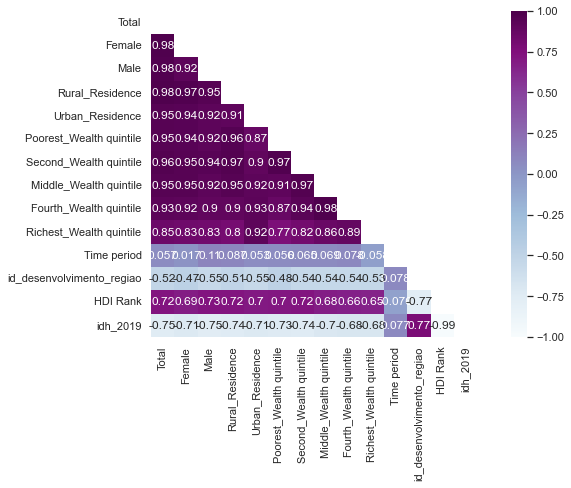

In [43]:
# Gráfico correlacional
corr = ls_tratados.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, center=0, cmap="BuPu", square=True)

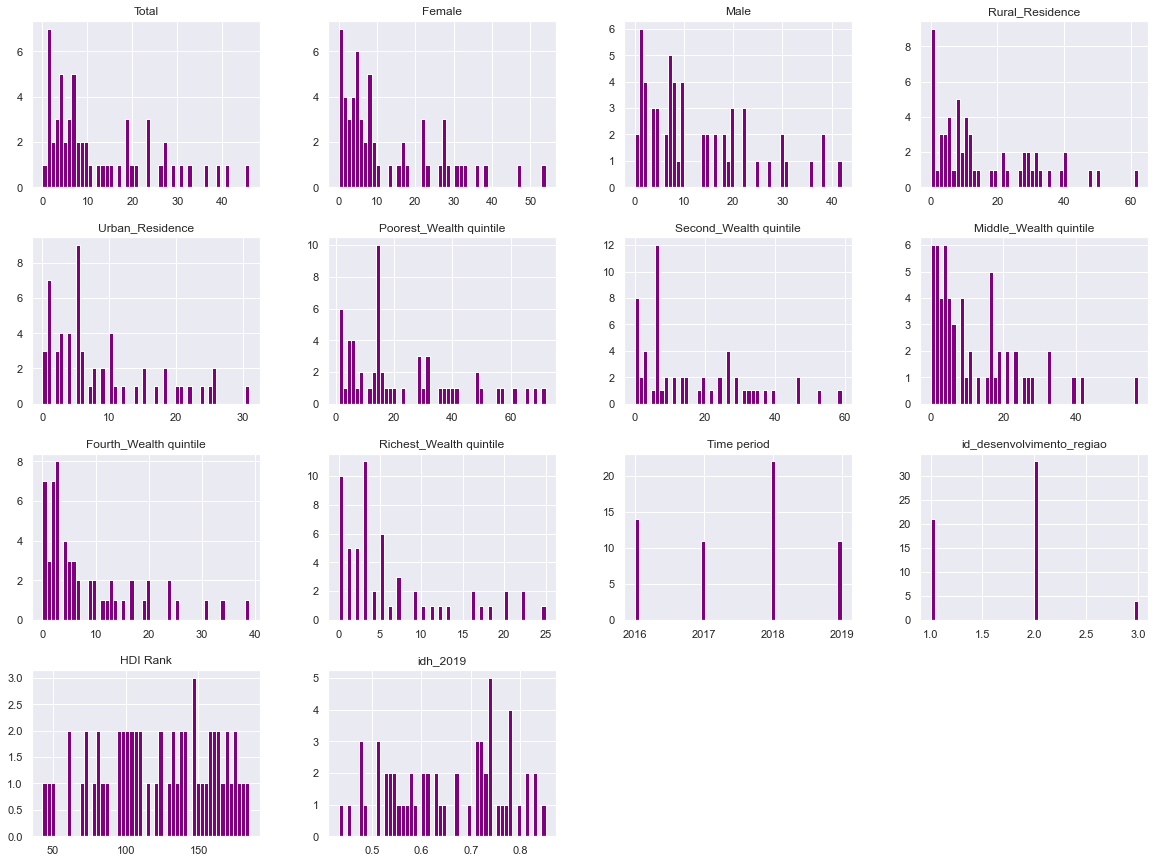

In [44]:
# plotagem de gráfico
ls_tratados.hist(bins=50, figsize=(20, 15), color="purple")
plt.show;

<AxesSubplot:xlabel='idh_2019', ylabel='Total'>

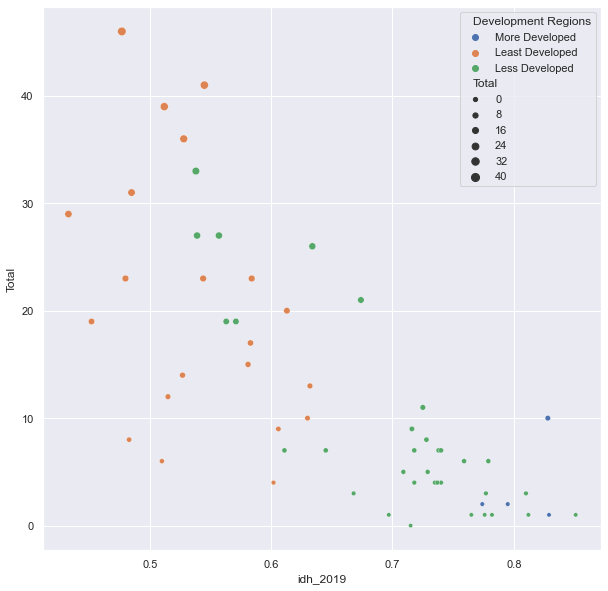

In [45]:
# idh X regiões desenvolvidas

sns.set(rc = {"figure.figsize" : (10, 10)})

sns.scatterplot(x="idh_2019", y='Total', data=ls_tratados, hue='Development Regions', size="Total")

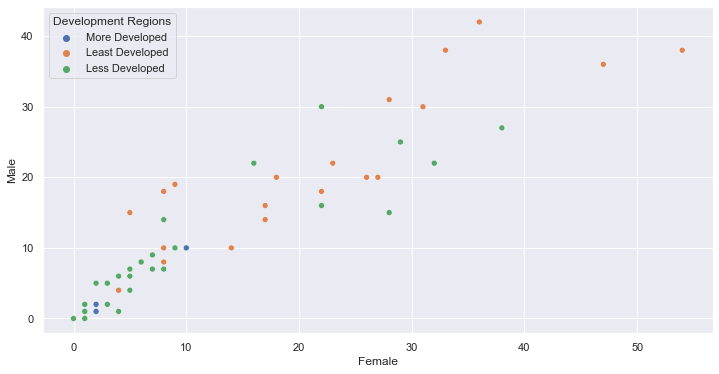

In [46]:
plt.figure(figsize=(12,6))
sns.scatterplot(ls_tratados['Female'],ls_tratados['Male'],hue=ls_tratados['Development Regions'])
plt.show()

#### Região

In [47]:
# filtrando apenas regiões
ls_tratados[['regiao', 'Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','id_desenvolvimento_regiao', 'idh_2019']].sort_values(['Development Regions'])

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,id_desenvolvimento_regiao,idh_2019
28,Sub-Saharan Africa,Lesotho,7.0,18.0,Least Developed,1,0.527
30,Sub-Saharan Africa,Malawi,5.0,8.0,Least Developed,1,0.483
29,Sub-Saharan Africa,Madagascar,21.0,40.0,Least Developed,1,0.528
56,Sub-Saharan Africa,Zambia,14.0,29.0,Least Developed,1,0.584
27,East Asia and Pacific,Lao People's Democratic Republic,15.0,22.0,Least Developed,1,0.613
25,East Asia and Pacific,Kiribati,9.0,11.0,Least Developed,1,0.630
43,Sub-Saharan Africa,Senegal,25.0,50.0,Least Developed,1,0.512
44,Sub-Saharan Africa,Sierra Leone,8.0,29.0,Least Developed,1,0.452
19,Latin America and Caribbean,Haiti,3.0,8.0,Least Developed,1,0.510
18,Sub-Saharan Africa,Guinea-Bissau,18.0,27.0,Least Developed,1,0.480


In [48]:
#Verificando a média do % de pessoas fora da escola em cada zona de residência e relacionando 
# com o desenvolvimento da região
ls_residence_dev = ls_tratados[['regiao','Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','idh_2019' ]]

ls_residence_dev

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
0,Europe and Central Asia,Albania,2.0,2.0,More Developed,0.795
1,Sub-Saharan Africa,Angola,10.0,28.0,Least Developed,0.581
2,Europe and Central Asia,Armenia,1.0,0.0,Less Developed,0.776
3,South Asia,Bangladesh,12.0,13.0,Least Developed,0.632
4,Latin America and Caribbean,Belize,4.0,12.0,Less Developed,0.716
5,Sub-Saharan Africa,Benin,31.0,48.0,Least Developed,0.545
6,Sub-Saharan Africa,Botswana,3.0,7.0,Less Developed,0.735
7,Latin America and Caribbean,Brazil,1.0,1.0,Less Developed,0.765
8,Sub-Saharan Africa,Burundi,20.0,31.0,Least Developed,0.433
9,Sub-Saharan Africa,Cameroon,10.0,28.0,Less Developed,0.563


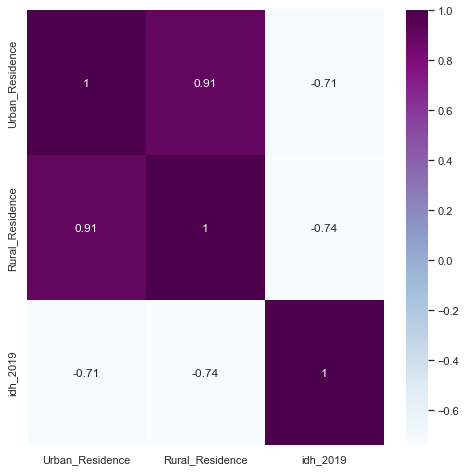

In [49]:
# Verificando a correlação entre desenvolvimento e % de pessoas fora da escola em cada zona de residência
plt.figure(figsize = (8,8))
ls_crr_residence = sns.heatmap(ls_residence_dev.corr(), annot = True, cmap = 'BuPu')

In [50]:
#Top 10 países com maior % de crianças fora da escola em zona rural
ls_top10Rural = ls_residence_dev.sort_values('Rural_Residence', ascending = False).head(10)
ls_top10Rural

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
17,Sub-Saharan Africa,Guinea,26.0,62.0,Least Developed,0.477
43,Sub-Saharan Africa,Senegal,25.0,50.0,Least Developed,0.512
5,Sub-Saharan Africa,Benin,31.0,48.0,Least Developed,0.545
12,Sub-Saharan Africa,Côte d'Ivoire,26.0,40.0,Less Developed,0.538
29,Sub-Saharan Africa,Madagascar,21.0,40.0,Least Developed,0.528
37,Sub-Saharan Africa,Nigeria,11.0,39.0,Less Developed,0.539
20,Latin America and Caribbean,Honduras,15.0,35.0,Less Developed,0.634
14,Sub-Saharan Africa,Ethiopia,22.0,33.0,Least Developed,0.485
39,South Asia,Pakistan,18.0,31.0,Less Developed,0.557
8,Sub-Saharan Africa,Burundi,20.0,31.0,Least Developed,0.433


In [51]:
#Top 10 países com maior % de crianças fora da escola em zona urbana

ls_top10Urban = ls_residence_dev.sort_values('Urban_Residence', ascending = False).head(10)
ls_top10Urban

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
5,Sub-Saharan Africa,Benin,31.0,48.0,Least Developed,0.545
12,Sub-Saharan Africa,Côte d'Ivoire,26.0,40.0,Less Developed,0.538
17,Sub-Saharan Africa,Guinea,26.0,62.0,Least Developed,0.477
43,Sub-Saharan Africa,Senegal,25.0,50.0,Least Developed,0.512
55,Sub-Saharan Africa,Uganda,24.0,23.0,Least Developed,0.544
14,Sub-Saharan Africa,Ethiopia,22.0,33.0,Least Developed,0.485
29,Sub-Saharan Africa,Madagascar,21.0,40.0,Least Developed,0.528
8,Sub-Saharan Africa,Burundi,20.0,31.0,Least Developed,0.433
18,Sub-Saharan Africa,Guinea-Bissau,18.0,27.0,Least Developed,0.480
39,South Asia,Pakistan,18.0,31.0,Less Developed,0.557


#### Gênero

#### Condição Financeira

#### Escala de desenvolvimento da região

## 4) Análise Upper Secondary

### Análise Exploratória

In [52]:
us.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Data source,Time period
0,AFG,Afghanistan,SA,SA,Least Developed,58.0,73.0,43.0,63.0,45.0,70.0,64.0,64.0,54.0,40.0,DHS 2015,2015.0
1,ALB,Albania,ECA,EECA,More Developed,12.0,12.0,12.0,16.0,9.0,27.0,11.0,11.0,5.0,5.0,DHS 2017-18,2018.0
2,DZA,Algeria,MENA,MENA,Less Developed,25.0,23.0,28.0,33.0,21.0,40.0,29.0,24.0,20.0,12.0,MICS 2012-13,2013.0
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,SSA,ESA,Least Developed,29.0,35.0,21.0,53.0,19.0,58.0,50.0,27.0,17.0,9.0,DHS 2015-16,2016.0


In [53]:
us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ISO3                     202 non-null    object 
 1   Countries and areas      202 non-null    object 
 2   Region                   200 non-null    object 
 3   Sub-region               200 non-null    object 
 4   Development Regions      202 non-null    object 
 5   Total                    108 non-null    float64
 6   Female                   108 non-null    float64
 7   Male                     108 non-null    float64
 8   Rural_Residence          106 non-null    float64
 9   Urban_Residence          106 non-null    float64
 10  Poorest_Wealth quintile  101 non-null    float64
 11  Second_Wealth quintile   101 non-null    float64
 12  Middle_Wealth quintile   101 non-null    float64
 13  Fourth_Wealth quintile   101 non-null    float64
 14  Richest_Wealth quintile  1

In [54]:
us.describe()

,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period
count,108.000000,108.000000,108.000000,106.000000,106.000000,101.000000,101.000000,101.000000,101.000000,101.000000,108.000000
mean,30.268519,31.472222,28.833333,36.518868,23.556604,46.960396,37.891089,32.386139,25.524752,16.910891,2015.527778
std,19.849719,22.820493,17.692334,22.581168,15.129335,24.739410,24.458905,22.197284,19.998297,15.049318,2.577611
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2010.000000
25%,15.000000,14.000000,15.000000,19.000000,12.250000,29.000000,18.000000,15.000000,11.000000,6.000000,2014.000000
50%,25.500000,26.500000,26.000000,34.000000,20.000000,44.000000,36.000000,27.000000,20.000000,12.000000,2016.000000
75%,43.000000,49.000000,43.000000,54.750000,32.750000,68.000000,57.000000,45.000000,37.000000,24.000000,2018.000000
max,86.000000,91.000000,79.000000,95.000000,70.000000,99.000000,97.000000,97.000000,92.000000,63.000000,2019.000000


### Limpeza e tratamento dos dados

In [55]:
# Adicionando datasets de informações e idh no dataframe Primary
us = us.merge(regioes[["id_regiao", "regiao"]], how='left', left_on='Region', right_on='id_regiao')
us = us.merge(desenv_regioes, how='left', left_on='Development Regions', right_on='desenvolvimento_regiao')
us = us.merge(idh, how='left', left_on='Countries and areas', right_on='pais_regiao')

#pr.drop(['id_regiao', 'desenvolvimento_regiao', 'Sub-region', 'pais_regiao'], axis=1, inplace=True)

us_mesclado = us.copy() #plotar o gráfico comparativo

us.head()

,ISO3,Countries and areas,Region,Sub-region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,...,Richest_Wealth quintile,Data source,Time period,id_regiao,regiao,id_desenvolvimento_regiao,desenvolvimento_regiao,HDI Rank,pais_regiao,idh_2019
0,AFG,Afghanistan,SA,SA,Least Developed,58.0,73.0,43.0,63.0,45.0,...,40.0,DHS 2015,2015.0,SA,South Asia,1,Least Developed,169,Afghanistan,0.511
1,ALB,Albania,ECA,EECA,More Developed,12.0,12.0,12.0,16.0,9.0,...,5.0,DHS 2017-18,2018.0,ECA,Europe and Central Asia,3,More Developed,69,Albania,0.795
2,DZA,Algeria,MENA,MENA,Less Developed,25.0,23.0,28.0,33.0,21.0,...,12.0,MICS 2012-13,2013.0,MENA,Middle East and North Africa,2,Less Developed,91,Algeria,0.748
3,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ECA,Europe and Central Asia,3,More Developed,36,Andorra,0.868
4,AGO,Angola,SSA,ESA,Least Developed,29.0,35.0,21.0,53.0,19.0,...,9.0,DHS 2015-16,2016.0,SSA,Sub-Saharan Africa,1,Least Developed,148,Angola,0.581


In [56]:
# Tratamento de países e regiões

# Nomeando as regiões desses países
#Canadá
us['Region'][33]='NA'
us['Sub-region'][33]='NA'

#USA
us['Region'][193]='NA'
us['Sub-region'][193]='NA'

# eliminando regiões sem nenhum dado que não é possível assumir uma média
us.drop(us[us['Sub-region'] == 'WE'].index, inplace=True)
us.drop(us[us['Sub-region'] == 'NA'].index, inplace=True)

# Exclusão de dados anteriores a 2016

us = us[us["Time period"] >= 2016]
us_pais_com_dados_recente = us.copy()

us.reset_index(inplace=True)
us.drop(['index'], axis=1, inplace=True) 
us_pais_com_dados = us.copy() # plotar o gráfico comparativo

In [57]:
# preenchendo espaços vazios
subRegions = us['Sub-region'].unique()
for i in subRegions:
    us.loc[us['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ]= us.loc[us['Sub-region']==i,
           'Total':'Richest_Wealth quintile' ].fillna(us[us['Sub-region']==i].median().round(1))

In [58]:
# Exclusão de HDI sem informações
us.dropna(subset=["HDI Rank"], inplace=True)

In [59]:
us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 0 to 59
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ISO3                       57 non-null     object 
 1   Countries and areas        57 non-null     object 
 2   Region                     57 non-null     object 
 3   Sub-region                 57 non-null     object 
 4   Development Regions        57 non-null     object 
 5   Total                      57 non-null     float64
 6   Female                     57 non-null     float64
 7   Male                       57 non-null     float64
 8   Rural_Residence            57 non-null     float64
 9   Urban_Residence            57 non-null     float64
 10  Poorest_Wealth quintile    57 non-null     float64
 11  Second_Wealth quintile     57 non-null     float64
 12  Middle_Wealth quintile     57 non-null     float64
 13  Fourth_Wealth quintile     57 non-null     float64
 

In [60]:
# organizando o novo dataframe tratado
us.drop(['desenvolvimento_regiao', 'Sub-region', 'pais_regiao', 'id_regiao', 'Data source'], axis=1, inplace=True)
us.to_csv('us_tratados.csv', index=False)

### Exploração dos dados

In [61]:
# importando e lendo o dataframe modificado
us_tratados = pd.read_csv('us_tratados.csv')
us_tratados.head()

,ISO3,Countries and areas,Region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period,regiao,id_desenvolvimento_regiao,HDI Rank,idh_2019
0,ALB,Albania,ECA,More Developed,12.0,12.0,12.0,16.0,9.0,27.0,11.0,11.0,5.0,5.0,2018.0,Europe and Central Asia,3,69,0.795
1,AGO,Angola,SSA,Least Developed,29.0,35.0,21.0,53.0,19.0,58.0,50.0,27.0,17.0,9.0,2016.0,Sub-Saharan Africa,1,148,0.581
2,ARM,Armenia,ECA,Less Developed,7.0,4.0,9.0,9.0,5.0,12.0,6.0,10.0,5.0,2.0,2016.0,Europe and Central Asia,2,81,0.776
3,BGD,Bangladesh,SA,Least Developed,31.0,26.0,37.0,32.0,30.0,45.0,35.0,29.0,28.0,19.0,2019.0,South Asia,1,133,0.632
4,BLZ,Belize,LAC,Less Developed,33.0,35.0,30.0,38.0,24.0,54.0,43.0,40.0,13.0,7.0,2016.0,Latin America and Caribbean,2,110,0.716


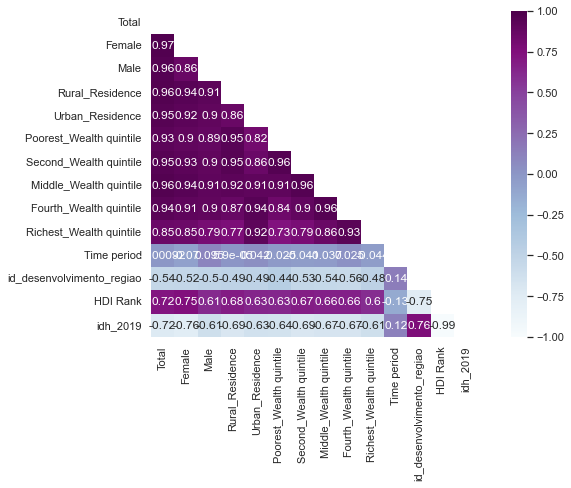

In [62]:
# Gráfico correlacional
corr = us_tratados.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, center=0, cmap="BuPu", square=True)

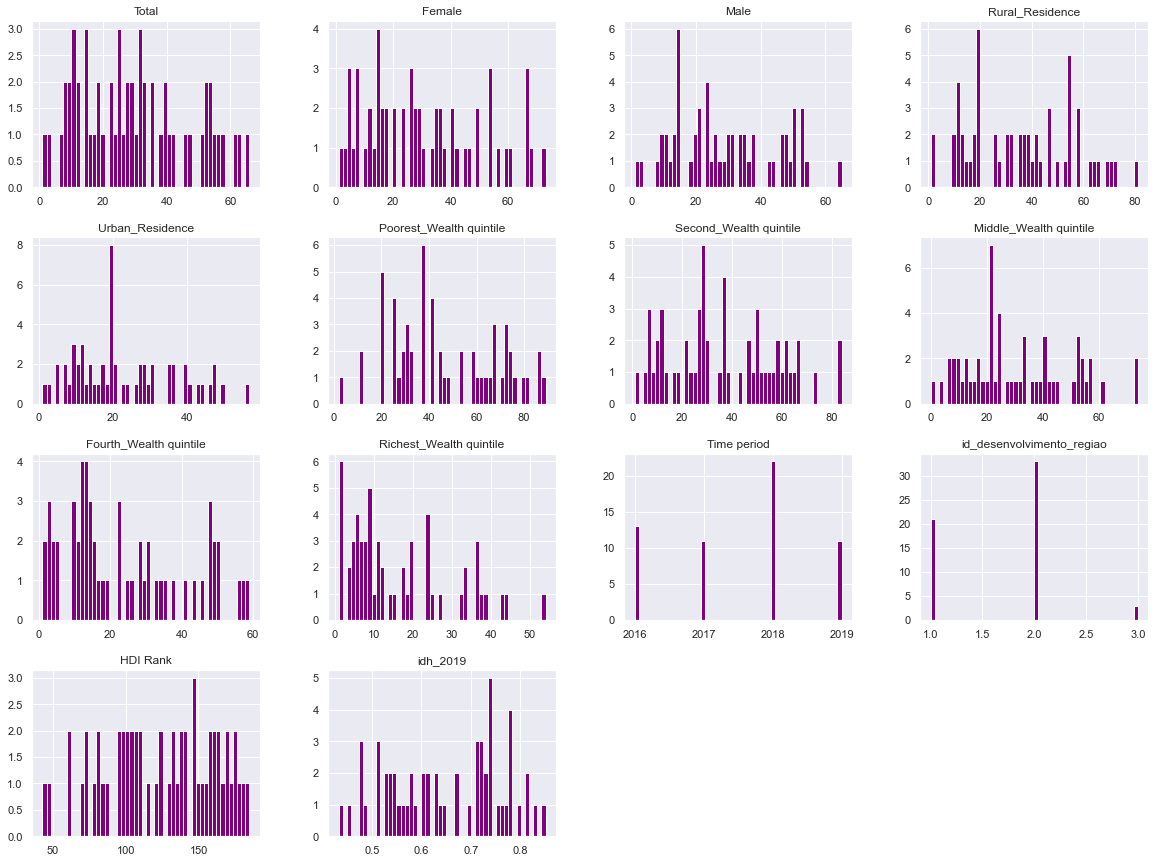

In [63]:
# plotagem de gráfico
us_tratados.hist(bins=50, figsize=(20, 15), color="purple")
plt.show;

<AxesSubplot:xlabel='idh_2019', ylabel='Total'>

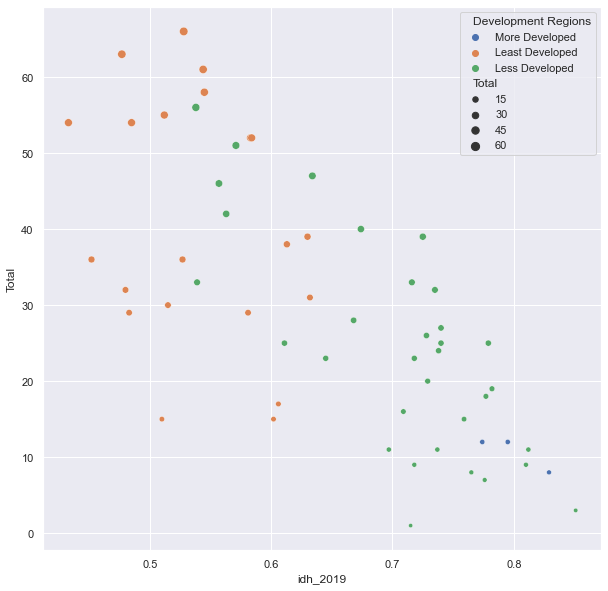

In [64]:
# idh X regiões desenvolvidas

sns.set(rc = {"figure.figsize" : (10, 10)})

sns.scatterplot(x="idh_2019", y='Total', data=us_tratados, hue='Development Regions', size="Total")

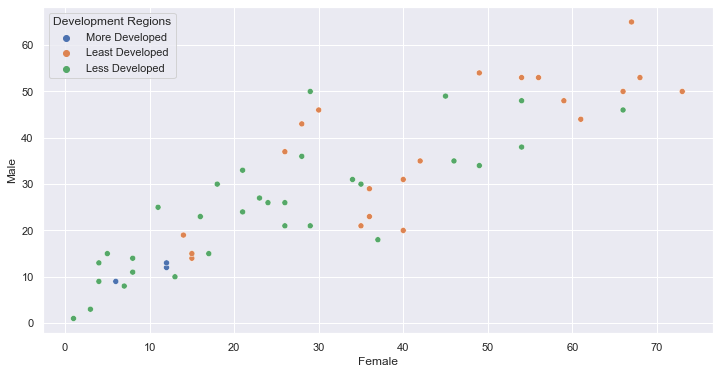

In [65]:
plt.figure(figsize=(12,6))
sns.scatterplot(us_tratados['Female'],us_tratados['Male'],hue=us_tratados['Development Regions'])
plt.show()

#### Região

In [73]:
# ordenando por regiões menos desenvolvidas
us_tratados[['regiao', 'Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','id_desenvolvimento_regiao', 'idh_2019']].sort_values(['Development Regions'])

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,id_desenvolvimento_regiao,idh_2019
28,Sub-Saharan Africa,Lesotho,21.0,43.0,Least Developed,1,0.527
30,Sub-Saharan Africa,Malawi,18.0,31.0,Least Developed,1,0.483
29,Sub-Saharan Africa,Madagascar,47.0,72.0,Least Developed,1,0.528
55,Sub-Saharan Africa,Zambia,46.0,58.0,Least Developed,1,0.584
27,East Asia and Pacific,Lao People's Democratic Republic,19.0,46.0,Least Developed,1,0.613
25,East Asia and Pacific,Kiribati,36.0,42.0,Least Developed,1,0.630
42,Sub-Saharan Africa,Senegal,40.0,69.0,Least Developed,1,0.512
43,Sub-Saharan Africa,Sierra Leone,21.0,54.0,Least Developed,1,0.452
19,Latin America and Caribbean,Haiti,10.0,18.0,Least Developed,1,0.510
18,Sub-Saharan Africa,Guinea-Bissau,28.0,35.0,Least Developed,1,0.480


In [74]:
#Verificando a média do % de pessoas fora da escola em cada zona de residência e relacionando 
# com o desenvolvimento da região
us_residence_dev = us_tratados[['regiao','Countries and areas', 'Urban_Residence','Rural_Residence','Development Regions','idh_2019' ]]

us_residence_dev

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
0,Europe and Central Asia,Albania,9.0,16.0,More Developed,0.795
1,Sub-Saharan Africa,Angola,19.0,53.0,Least Developed,0.581
2,Europe and Central Asia,Armenia,5.0,9.0,Less Developed,0.776
3,South Asia,Bangladesh,30.0,32.0,Least Developed,0.632
4,Latin America and Caribbean,Belize,24.0,38.0,Less Developed,0.716
5,Sub-Saharan Africa,Benin,50.0,65.0,Least Developed,0.545
6,Sub-Saharan Africa,Botswana,26.0,46.0,Less Developed,0.735
7,Latin America and Caribbean,Brazil,7.0,12.0,Less Developed,0.765
8,Sub-Saharan Africa,Burundi,44.0,55.0,Least Developed,0.433
9,Sub-Saharan Africa,Cameroon,31.0,55.0,Less Developed,0.563


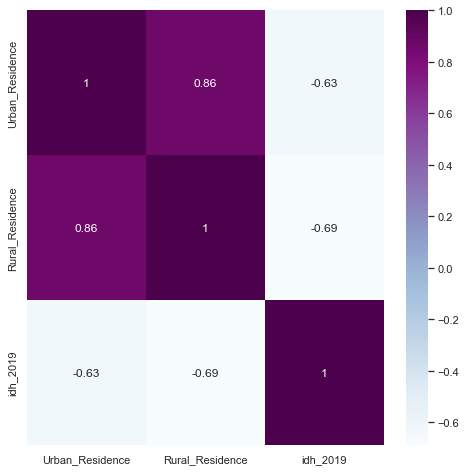

In [75]:
# Verificando a correlação entre desenvolvimento e % de pessoas fora da escola em cada zona de residência
plt.figure(figsize = (8,8))
us_corr_residence = sns.heatmap(us_residence_dev.corr(), annot = True, cmap = 'BuPu')

In [76]:
#Top 10 países com maior % de crianças fora da escola em zona rural
us_top10Rural = us_residence_dev.sort_values('Rural_Residence', ascending = False).head(10)
us_top10Rural

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
17,Sub-Saharan Africa,Guinea,40.0,81.0,Least Developed,0.477
29,Sub-Saharan Africa,Madagascar,47.0,72.0,Least Developed,0.528
12,Sub-Saharan Africa,Côte d'Ivoire,47.0,70.0,Less Developed,0.538
42,Sub-Saharan Africa,Senegal,40.0,69.0,Least Developed,0.512
5,Sub-Saharan Africa,Benin,50.0,65.0,Least Developed,0.545
20,Latin America and Caribbean,Honduras,28.0,64.0,Less Developed,0.634
54,Sub-Saharan Africa,Uganda,57.0,62.0,Least Developed,0.544
35,East Asia and Pacific,Myanmar,35.0,58.0,Least Developed,0.583
55,Sub-Saharan Africa,Zambia,46.0,58.0,Least Developed,0.584
14,Sub-Saharan Africa,Ethiopia,41.0,58.0,Least Developed,0.485


In [77]:
#Top 10 países com maior % de crianças fora da escola em zona urbana

us_top10Urban = us_residence_dev.sort_values('Urban_Residence', ascending = False).head(10)
us_top10Urban

,regiao,Countries and areas,Urban_Residence,Rural_Residence,Development Regions,idh_2019
54,Sub-Saharan Africa,Uganda,57.0,62.0,Least Developed,0.544
5,Sub-Saharan Africa,Benin,50.0,65.0,Least Developed,0.545
12,Sub-Saharan Africa,Côte d'Ivoire,47.0,70.0,Less Developed,0.538
29,Sub-Saharan Africa,Madagascar,47.0,72.0,Least Developed,0.528
55,Sub-Saharan Africa,Zambia,46.0,58.0,Least Developed,0.584
8,Sub-Saharan Africa,Burundi,44.0,55.0,Least Developed,0.433
56,Sub-Saharan Africa,Zimbabwe,43.0,55.0,Less Developed,0.571
14,Sub-Saharan Africa,Ethiopia,41.0,58.0,Least Developed,0.485
17,Sub-Saharan Africa,Guinea,40.0,81.0,Least Developed,0.477
42,Sub-Saharan Africa,Senegal,40.0,69.0,Least Developed,0.512


#### Gênero

#### Condição Financeira

#### Escala de desenvolvimento da região

## 5) Conclusão e resultados

### Região - África Subsaariana

![Região da África Subsariana](https://static.todamateria.com.br/upload/af/ri/africasubsaarianamapa-0.jpg)

A região com maior percentual de crianças fora da escola é a África Subsaariana: uma das regiões mais pobres do mundo, com altos índices de mortalidade infantil, analfabetismo e baixa expecativa de vida.

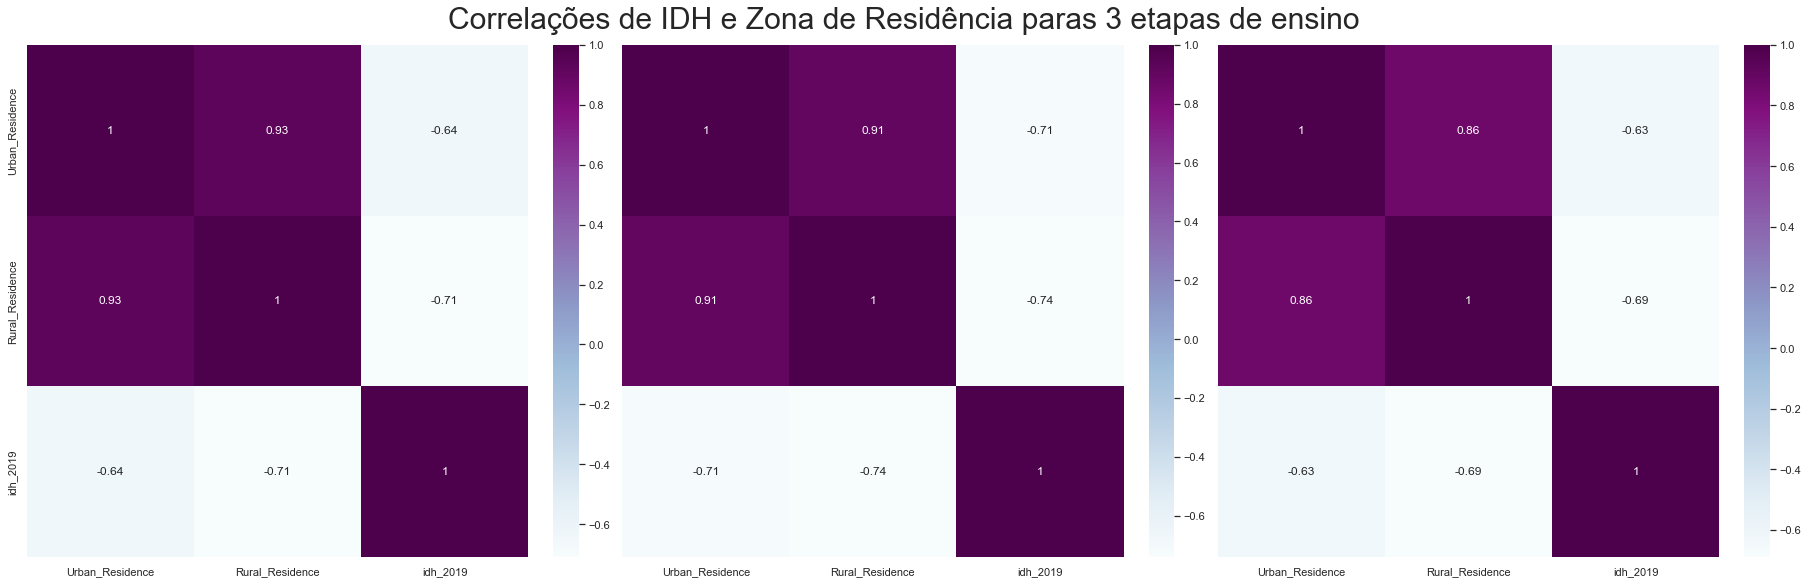

In [84]:
# Correlação das 3 etapas de ensino lado a lado:
# Criando a figura lado a lado 
fig, axs = plt.subplots(1, 3, sharey=True, constrained_layout = True, figsize=(25,8)) 
fig.suptitle("Correlações de IDH e Zona de Residência paras 3 etapas de ensino:", fontsize=30)


sns.heatmap(ax = axs[0], data = pr_residence_dev.corr(), annot = True, cmap = 'BuPu')

sns.heatmap(ax = axs[1], data = ls_residence_dev.corr(), annot = True, cmap = 'BuPu')


sns.heatmap(ax = axs[2], data = us_residence_dev.corr(), annot = True, cmap = 'BuPu')


plt.show()

> Em todas as etapas de ensino, a Zona Rural é a mais afetada pelo IDH. 
> O desenvolvimento do país está correlacionado inversamente com a alta taxa de não-matrícula na zona rural dos países. Isso acontece com mais força na etapa de ensino PRIMÁRIA.
> No Ensino Médio, o IDH tem uma correlação relativamente baixa com a taxa de crianças fora da escola em ambas as zonas de residência.

In [90]:
# Concatenando tabelas['
concatenado = pd.concat([pr_tratados.assign(dataset='pr'), ls_tratados.assign(dataset='ls'), us_tratados.assign(dataset='us') ])

concatenado

,ISO3,Countries and areas,Region,Development Regions,Total,Female,Male,Rural_Residence,Urban_Residence,Poorest_Wealth quintile,Second_Wealth quintile,Middle_Wealth quintile,Fourth_Wealth quintile,Richest_Wealth quintile,Time period,regiao,id_desenvolvimento_regiao,HDI Rank,idh_2019,dataset
0,ALB,Albania,ECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,2018.0,Europe and Central Asia,3,69,0.795,pr
1,AGO,Angola,SSA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,2016.0,Sub-Saharan Africa,1,148,0.581,pr
2,ARM,Armenia,ECA,Less Developed,5.0,4.0,5.0,6.0,3.0,6.0,7.0,6.0,3.0,2.0,2016.0,Europe and Central Asia,2,81,0.776,pr
3,BGD,Bangladesh,SA,Least Developed,6.0,5.0,8.0,6.0,6.0,9.0,7.0,5.0,6.0,4.0,2019.0,South Asia,1,133,0.632,pr
4,BLZ,Belize,LAC,Less Developed,2.0,2.0,2.0,3.0,1.0,4.0,4.0,1.0,1.0,0.0,2016.0,Latin America and Caribbean,2,110,0.716,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,TUN,Tunisia,MENA,Less Developed,27.0,21.0,33.0,41.0,20.0,47.0,36.0,24.0,16.0,8.0,2018.0,Middle East and North Africa,2,95,0.740,us
53,TKM,Turkmenistan,ECA,Less Developed,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,2016.0,Europe and Central Asia,2,111,0.715,us
54,UGA,Uganda,SSA,Least Developed,61.0,68.0,53.0,62.0,57.0,73.0,66.0,57.0,57.0,54.0,2016.0,Sub-Saharan Africa,1,159,0.544,us
55,ZMB,Zambia,SSA,Least Developed,52.0,61.0,44.0,58.0,46.0,73.0,59.0,51.0,50.0,36.0,2018.0,Sub-Saharan Africa,1,146,0.584,us


ValueError: cannot reindex from a duplicate axis

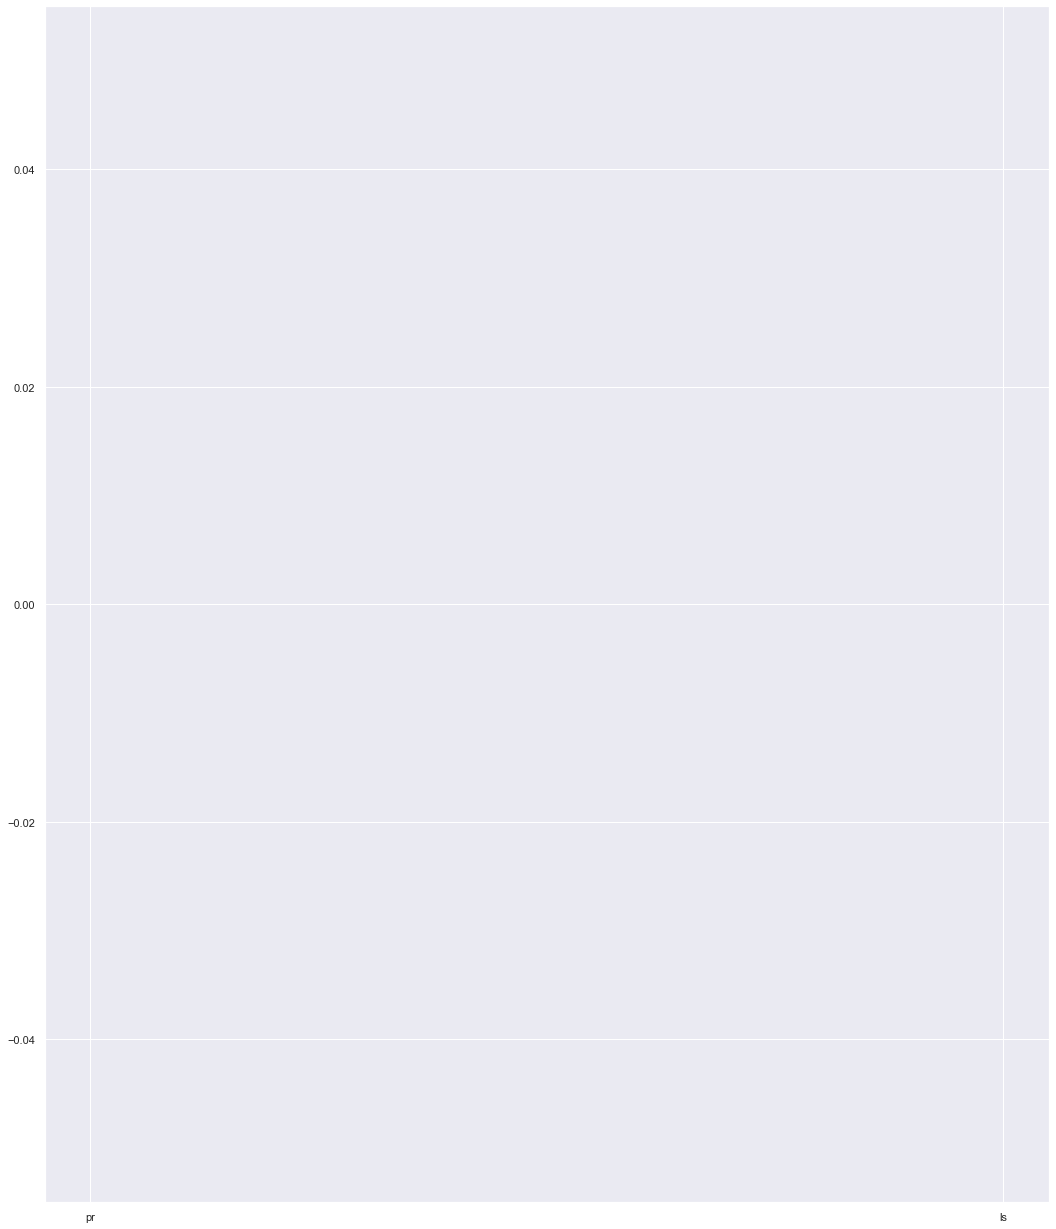

In [113]:
concatenado.reset_index()

#Risquinhos
sns.set_theme(style="darkgrid")
plt.figure(figsize = (18,22))
# Load an example dataset with long-form data
#fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="dataset", y="Total",
             hue="Development Regions", style="Countries and areas",
             data = concatenado)


In [ ]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Male", y="Countries and areas", data=pr_tratados,
            label="Male", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="Female", y="Countries and areas",data= pr_tratados,
            label="Female", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)
